In [27]:
import pandas as pd
import numpy as np

# 2016 - 2017


The available data for season 2016/20 and 2017/2018 did come in separate files for each gameweeks while 2018/2019 and 2019/2020 were already merged. 

In [28]:

all_game_weeks_list_2016_2017 = []

#Ierate through each file in the gw-folder to merge all gw to a whole season. 
for i in range(38):
  gw = i + 1
  all_game_weeks_list_2016_2017.append(
      pd.read_csv(f'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/gws/gw{gw}.csv', encoding = "ISO-8859-1")
  )

#Display example of first 5 players
display(all_game_weeks_list_2016_2017[0].head())
print('Number of gameweeks: ', len(all_game_weeks_list_2016_2017))


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2016-08-15T19:00:00Z,15 Aug 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,False,0,0
1,Aaron_Lennon,0,3,0,0,0,6,0,1,2,0.3,0,0,142,0,0,3,0,0,0,0.9,142,8.2,0,2016-08-13T14:00:00Z,13 Aug 15:00,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0.0,1,0,0,0,60,True,0,0
2,Aaron_Ramsey,0,26,0,0,0,5,0,2,22,4.9,1,0,16,0,0,8,0,3,0,3.0,16,2.2,0,2016-08-14T15:00:00Z,14 Aug 16:00,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23.0,2,0,0,0,80,True,0,0
3,Abdoulaye_Doucouré,0,0,0,0,0,0,0,0,0,0.0,0,0,482,0,0,7,0,0,0,0.0,482,0.0,0,2016-08-13T14:00:00Z,13 Aug 15:00,0,0,0,0,0,13,0,0,0,0,0,0,1,0,1051,0,0,0,1,1,0.0,0,0,0,0,50,False,0,0
4,Abdul Rahman_Baba,0,0,0,0,0,0,0,0,0,0.0,0,0,80,0,0,10,0,0,0,0.0,80,0.0,0,2016-08-15T19:00:00Z,15 Aug 20:00,0,0,0,0,0,20,0,0,0,0,0,0,1,0,1243,0,0,0,1,2,0.0,0,0,0,0,55,True,0,0


Number of gameweeks:  38


In [29]:
#Add gameweek number column GW
for i in range(38):
  all_game_weeks_list_2016_2017[i]["GW"] = i+1

#Display examples of first and last gameweeks.
display(all_game_weeks_list_2016_2017[0].head(3))
display(all_game_weeks_list_2016_2017[37].head(3))


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2016-08-15T19:00:00Z,15 Aug 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,False,0,0,1
1,Aaron_Lennon,0,3,0,0,0,6,0,1,2,0.3,0,0,142,0,0,3,0,0,0,0.9,142,8.2,0,2016-08-13T14:00:00Z,13 Aug 15:00,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0.0,1,0,0,0,60,True,0,0,1
2,Aaron_Ramsey,0,26,0,0,0,5,0,2,22,4.9,1,0,16,0,0,8,0,3,0,3.0,16,2.2,0,2016-08-14T15:00:00Z,14 Aug 16:00,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23.0,2,0,0,0,80,True,0,0,1


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell,0,30,0,0,0,7,0,2,21,26.2,0,0,454,0,0,372,0,1,0,4.2,23459,9.2,2,2017-05-21T14:00:00Z,21 May 15:00,0,0,90,1,1,3,0,0,0,0,0,0,38,0,14664,3,0,1,2,1,7.0,2,290,446,156,51,False,0,0,38
1,Aaron_Lennon,0,0,0,0,0,0,0,0,0,0.0,0,0,142,0,0,371,0,0,0,0.0,23147,0.0,0,2017-05-21T14:00:00Z,21 May 15:00,0,0,0,0,0,1,0,0,0,0,0,0,38,0,8278,0,0,0,1,3,0.0,0,-33,13,46,55,False,0,0,38
2,Aaron_Ramsdale,0,0,0,0,0,0,0,0,0,0.0,0,0,677,0,0,375,0,0,0,0.0,23682,0.0,0,2017-05-21T14:00:00Z,21 May 15:00,0,0,0,0,0,8,0,0,0,0,0,0,38,0,0,0,0,0,1,1,0.0,0,0,0,0,40,False,0,0,38


In [30]:
#Create one large dataframe for the whole season
season_2016_2017 = pd.concat(all_game_weeks_list_2016_2017) 

print('Totalt rows from 2016/2017 season: ', len(season_2016_2017))


Totalt rows from 2016/2017 season:  23679


We merged our  16/17 mastertable with the *player_raw* datasets to add team and position for each player.

In [31]:
#Read players_raw
players_16_17 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/players_raw.csv')

#Change name of "id" and "element_type" to the more intuitive "player_id" and "position"
players_16_17["player_id"] = players_16_17["id"]
players_16_17["position"] = players_16_17["element_type"]

#Merge datasets
season_2016_2017 = pd.merge(season_2016_2017, players_16_17[["player_id", "team","position"]], how="left", left_on="element", right_on="player_id")

#Display first rows
season_2016_2017.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW,player_id,team,position
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2016-08-15T19:00:00Z,15 Aug 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,False,0,0,1,454,20,2
1,Aaron_Lennon,0,3,0,0,0,6,0,1,2,0.3,0,0,142,0,0,3,0,0,0,0.9,142,8.2,0,2016-08-13T14:00:00Z,13 Aug 15:00,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0.0,1,0,0,0,60,True,0,0,1,142,6,3
2,Aaron_Ramsey,0,26,0,0,0,5,0,2,22,4.9,1,0,16,0,0,8,0,3,0,3.0,16,2.2,0,2016-08-14T15:00:00Z,14 Aug 16:00,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23.0,2,0,0,0,80,True,0,0,1,16,1,3
3,Abdoulaye_Doucouré,0,0,0,0,0,0,0,0,0,0.0,0,0,482,0,0,7,0,0,0,0.0,482,0.0,0,2016-08-13T14:00:00Z,13 Aug 15:00,0,0,0,0,0,13,0,0,0,0,0,0,1,0,1051,0,0,0,1,1,0.0,0,0,0,0,50,False,0,0,1,482,18,3
4,Abdul Rahman_Baba,0,0,0,0,0,0,0,0,0,0.0,0,0,80,0,0,10,0,0,0,0.0,80,0.0,0,2016-08-15T19:00:00Z,15 Aug 20:00,0,0,0,0,0,20,0,0,0,0,0,0,1,0,1243,0,0,0,1,2,0.0,0,0,0,0,55,True,0,0,1,80,4,2


In [32]:
# Select only relevant columns for our models
season_2016_2017 = season_2016_2017[["name","position","player_id", "team", "GW", "opponent_team", "was_home", "minutes", "bps", "ict_index", "selected", "transfers_balance", "total_points","goals_scored","assists","clean_sheets","goals_conceded","influence","creativity","threat"]]

# Change boolean was_home to integer
season_2016_2017["was_home"] = season_2016_2017["was_home"].astype(int)

#Display first rows
season_2016_2017.head(5)

,name,position,player_id,team,GW,opponent_team,was_home,minutes,bps,ict_index,selected,transfers_balance,total_points,goals_scored,assists,clean_sheets,goals_conceded,influence,creativity,threat
0,Aaron_Cresswell,2,454,20,1,4,0,0,0,0.0,14023,0,0,0,0,0,0,0.0,0.0,0.0
1,Aaron_Lennon,3,142,6,1,17,1,15,6,0.9,13918,0,1,0,0,0,0,8.2,0.3,0.0
2,Aaron_Ramsey,3,16,1,1,9,1,60,5,3.0,163170,0,2,0,0,0,3,2.2,4.9,23.0
3,Abdoulaye_Doucouré,3,482,18,1,13,0,0,0,0.0,1051,0,0,0,0,0,0,0.0,0.0,0.0
4,Abdul Rahman_Baba,2,80,4,1,20,1,0,0,0.0,1243,0,0,0,0,0,0,0.0,0.0,0.0


In [33]:
#Display summary of dataset
season_2016_2017.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23679 entries, 0 to 23678
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               23679 non-null  object 
 1   position           23679 non-null  int64  
 2   player_id          23679 non-null  int64  
 3   team               23679 non-null  int64  
 4   GW                 23679 non-null  int64  
 5   opponent_team      23679 non-null  int64  
 6   was_home           23679 non-null  int64  
 7   minutes            23679 non-null  int64  
 8   bps                23679 non-null  int64  
 9   ict_index          23679 non-null  float64
 10  selected           23679 non-null  int64  
 11  transfers_balance  23679 non-null  int64  
 12  total_points       23679 non-null  int64  
 13  goals_scored       23679 non-null  int64  
 14  assists            23679 non-null  int64  
 15  clean_sheets       23679 non-null  int64  
 16  goals_conceded     236

The season_2016_2017 dataset is now ready for data manipulation.

# 2017 - 2018 (Same procedure as for 16-17)

In [34]:
# Put all separate gameweeks into one list 
all_game_weeks_list_2017_2018 = []
for i in range(38):
  gw = i + 1
  all_game_weeks_list_2017_2018.append(
      pd.read_csv(f'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/gws/gw{gw}.csv', encoding = "ISO-8859-1")
  )

# Add GW column
for i in range(38):
  all_game_weeks_list_2017_2018[i]["GW"] = i+1

# Create large dataframe for whole season
season_2017_2018 = pd.concat(all_game_weeks_list_2017_2018)

# Merge with players_raw to add position and team
players_17_18 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/players_raw.csv')
players_17_18["player_id"] = players_17_18["id"]
players_17_18["position"] = players_17_18["element_type"]
season_2017_2018 = pd.merge(season_2017_2018, players_17_18[["player_id", "team","position"]], how="left", left_on="element", right_on="player_id")

# Select relevant columns
season_2017_2018 = season_2017_2018[["name","position","player_id", "team", "GW", "opponent_team", "was_home", "minutes", "bps", "ict_index", "selected", "transfers_balance", "total_points","goals_scored","assists","clean_sheets","goals_conceded","influence","creativity","threat"]]

# Boolean was_home to integer
season_2017_2018["was_home"] = season_2017_2018["was_home"].astype(int)

#Display first rows
display(season_2017_2018.head(5))



,name,position,player_id,team,GW,opponent_team,was_home,minutes,bps,ict_index,selected,transfers_balance,total_points,goals_scored,assists,clean_sheets,goals_conceded,influence,creativity,threat
0,Aaron_Cresswell,2,443,20,1,12,0,9,3,1.9,25136,0,0,0,0,0,2,0.4,0.6,18.0
1,Aaron_Lennon,3,153,4,1,15,1,0,0,0.0,4681,0,0,0,0,0,0,0.0,0.0,0.0
2,Aaron_Mooy,3,172,8,1,6,0,90,22,8.7,59955,0,6,0,1,1,0,40.2,46.9,0.0
3,Aaron_Ramsey,3,18,1,1,9,1,23,16,6.7,33792,0,6,1,0,0,0,29.6,11.2,26.0
4,Abdoulaye_Doucouré,3,414,18,1,10,1,90,36,10.9,1207,0,9,1,0,0,3,48.6,25.2,35.0


In [35]:
#Display summary of dataset
season_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 0 to 22466
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               22467 non-null  object 
 1   position           22467 non-null  int64  
 2   player_id          22467 non-null  int64  
 3   team               22467 non-null  int64  
 4   GW                 22467 non-null  int64  
 5   opponent_team      22467 non-null  int64  
 6   was_home           22467 non-null  int64  
 7   minutes            22467 non-null  int64  
 8   bps                22467 non-null  int64  
 9   ict_index          22467 non-null  float64
 10  selected           22467 non-null  int64  
 11  transfers_balance  22467 non-null  int64  
 12  total_points       22467 non-null  int64  
 13  goals_scored       22467 non-null  int64  
 14  assists            22467 non-null  int64  
 15  clean_sheets       22467 non-null  int64  
 16  goals_conceded     224

Dataset 2017/2018 is now ready for data manipulation.

# 2018 - 2019

Both season 2018/2019 and 2019/2020 had already merged gameweeks so we skip the first step from the two previous seasons.

In [36]:
# Read whole season
season_2018_2019 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/merged_gw.csv', encoding = "ISO-8859-1")

# Merge with players_raw to get position and team
players_18_19 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/players_raw.csv')
players_18_19["player_id"] = players_18_19["id"]
players_18_19["position"] = players_18_19["element_type"]
season_2018_2019 = pd.merge(season_2018_2019, players_18_19[["player_id", "team","position"]], how="left", left_on="element", right_on="player_id")

# Select relevant columns
season_2018_2019 = season_2018_2019[["name","position","player_id", "team", "GW", "opponent_team", "was_home", "minutes", "bps", "ict_index", "selected", "transfers_balance", "total_points","goals_scored","assists","clean_sheets","goals_conceded","influence","creativity","threat"]]

# Change was_home 
season_2018_2019["was_home"] = season_2018_2019["was_home"].astype(int)

#Display first rows
display(season_2018_2019.head(5))


,name,position,player_id,team,GW,opponent_team,was_home,minutes,bps,ict_index,selected,transfers_balance,total_points,goals_scored,assists,clean_sheets,goals_conceded,influence,creativity,threat
0,Aaron_Cresswell_402,2,402,19,1,12,0,0,0,0.0,103396,0,0,0,0,0,0,0.0,0.0,0.0
1,Aaron_Lennon_83,3,83,4,1,16,0,90,6,3.9,15138,0,3,0,0,1,0,10.0,12.3,17.0
2,Aaron_Mooy_199,3,199,10,1,6,1,90,24,3.8,192110,0,2,0,0,0,3,20.2,18.2,0.0
3,Aaron_Ramsey_14,3,14,1,1,13,1,53,7,2.9,60423,0,1,0,0,0,1,9.4,10.8,9.0
4,Aaron_Wan-Bissaka_145,2,145,7,1,9,0,90,38,6.0,652304,0,12,0,1,1,0,46.0,14.0,0.0


In [37]:
#Display summary of dataset
season_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 0 to 21789
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               21790 non-null  object 
 1   position           21790 non-null  int64  
 2   player_id          21790 non-null  int64  
 3   team               21790 non-null  int64  
 4   GW                 21790 non-null  int64  
 5   opponent_team      21790 non-null  int64  
 6   was_home           21790 non-null  int64  
 7   minutes            21790 non-null  int64  
 8   bps                21790 non-null  int64  
 9   ict_index          21790 non-null  float64
 10  selected           21790 non-null  int64  
 11  transfers_balance  21790 non-null  int64  
 12  total_points       21790 non-null  int64  
 13  goals_scored       21790 non-null  int64  
 14  assists            21790 non-null  int64  
 15  clean_sheets       21790 non-null  int64  
 16  goals_conceded     217

Dataset season_2018_2019 is now ready for data manipulation

# 2019 - 2020


In [38]:
# Same procedure as previous season

# Read all gameweeks
season_2019_2020 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/merged_gw.csv', encoding = "ISO-8859-1")

# Merge with players_raw to get position and team
players_19_20 = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/players_raw.csv')
players_19_20["player_id"] = players_19_20["id"]
players_19_20["position"] = players_19_20["element_type"]
season_2019_2020 = pd.merge(season_2019_2020, players_19_20[["player_id", "team","position"]], how="left", left_on="element", right_on="player_id")

# Select relevant columns
season_2019_2020 = season_2019_2020[["name","position","player_id", "team", "GW", "opponent_team", "was_home", "minutes", "bps", "ict_index", "selected", "transfers_balance", "total_points","goals_scored","assists","clean_sheets","goals_conceded","influence","creativity","threat"]]

# Adjust gw39-gw47 to gw30-gw38 because of Corona-break.
season_2019_2020["GW"] = season_2019_2020["GW"].apply(lambda e: e if e <= 29 else e - 9)

#Change was_home to int
season_2019_2020["was_home"] = season_2019_2020["was_home"].astype(int)

#Display first rows
display(season_2019_2020.head(5))


,name,position,player_id,team,GW,opponent_team,was_home,minutes,bps,ict_index,selected,transfers_balance,total_points,goals_scored,assists,clean_sheets,goals_conceded,influence,creativity,threat
0,Aaron_Cresswell_376,2,376,19,1,11,1,90,7,1.1,23399,0,0,0,0,0,5,9.0,1.5,0.0
1,Aaron_Lennon_430,3,430,5,1,16,1,6,3,0.2,8105,0,1,0,0,0,0,2.0,0.0,0.0
2,Aaron_Mooy_516,3,516,4,1,18,0,0,0,0.0,16261,0,0,0,0,0,0,0.0,0.0,0.0
3,Aaron_Ramsdale_494,1,494,3,1,15,1,90,11,1.0,3091,0,2,0,0,0,1,9.8,0.0,0.0
4,Aaron_Wan-Bissaka_122,2,122,12,1,6,1,90,34,4.9,1879259,0,8,0,0,1,0,30.4,16.1,2.0


In [39]:
#Display summary of dataset
season_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22560 entries, 0 to 22559
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               22560 non-null  object 
 1   position           22560 non-null  int64  
 2   player_id          22560 non-null  int64  
 3   team               22560 non-null  int64  
 4   GW                 22560 non-null  int64  
 5   opponent_team      22560 non-null  int64  
 6   was_home           22560 non-null  int64  
 7   minutes            22560 non-null  int64  
 8   bps                22560 non-null  int64  
 9   ict_index          22560 non-null  float64
 10  selected           22560 non-null  int64  
 11  transfers_balance  22560 non-null  int64  
 12  total_points       22560 non-null  int64  
 13  goals_scored       22560 non-null  int64  
 14  assists            22560 non-null  int64  
 15  clean_sheets       22560 non-null  int64  
 16  goals_conceded     225

Nå er alle datasettene klare til å manipuleres. De heter

- season_2016_2017
- season_2017_2018
- season_2018_2019
- season_2019_2020

In [40]:
#Check to validate that all seasons have same columns
print(season_2016_2017.columns == season_2017_2018.columns)
print(season_2017_2018.columns == season_2018_2019.columns)
print(season_2018_2019.columns == season_2019_2020.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


# Feature engineering

In [55]:
# Calculate the difficulty of a match based on the differene in strength of both teams and if the player is playing at home.

#Input dataframe season and list of teams strength
def apply_fixture_diff(season, diff_lst): 
  season["opponent_strength"] = 0
  season["team_strength"] = 0
  season
  for i in diff_lst:

    all_data_most_diff = season["opponent_team"].isin(i)
    season.loc[all_data_most_diff,"opponent_strength"] = diff_lst.index(i) +1 
    all_data_own_team = season["team"].isin(i)
    season.loc[all_data_own_team,"team_strength"] = diff_lst.index(i) +1 

  #Add the fixture difficulties to season dataframe
  season["fixture_diff"] = (season["team_strength"] - season["opponent_strength"] + season["was_home"]*2)


In [56]:
# Manually divided final table into slots of team strength for 2016/17.
most_diff_16_17 = [4, 17] # Chelsea, Spurs
second_diff_16_17 = [10, 9, 1, 11, 6] # City, Liverpool, Arsnenal, United, Everton
third_diff_16_17 = [13, 2, 19, 20, 8, 14, 5, 16, 3, 18] # Southampton, Bournemouth, West Bromwich, West Ham, Leicester, Stoke, Crystal P, Swansea, Burnley, Watford
last_diff_16_17 = [7, 12, 15] # Hull, Middlesbrough, Sunderland

diff_lst_16_17 = [last_diff_16_17, third_diff_16_17, second_diff_16_17, most_diff_16_17]

# Manually divided final table into slots of team strength for 2017/18.
most_diff_17_18 = [11, 12] # City, United
second_diff_17_18 = [17, 10, 5, 1, 4] # Spurs, Liverpool, Chelsea, Arsenal, Burnley
third_diff_17_18 = [7, 9, 13, 6, 2, 20, 18, 3] # Everton, Leicester, Newcastle, Crystal P, Bournemouth, West Ham, Watford, Brighton
last_diff_17_18 = [8, 14, 16, 15, 19] # Huddersfield, Southampton, Swansea, Stoke, West Bromwich

diff_lst_17_18 = [last_diff_17_18, third_diff_17_18, second_diff_17_18, most_diff_17_18]

# Manually divided final table into slots of team strength for 2018/19.
most_diff_18_19 = [12, 13] # Liverpool, City
second_diff_18_19 = [6, 17, 1, 14, 20, 8] # Chelsea, Spurs, Arsenal, United, Wolves, Everton
third_diff_18_19 = [11, 19, 18, 7, 15, 2] # Leicester, WestHam, Watford, Crystal, Newcastle, Bournemouth
last_diff_18_19 = [4, 16, 3, 5, 9, 10] # Burnley, Southampton, Brighton, Cardiff, Fulham, Huddersfield

diff_lst_18_19 = [last_diff_18_19, third_diff_18_19, second_diff_18_19, most_diff_18_19]

# Manually divided final table into slots of team strength for 2019/20.
most_diff_19_20 = [10,11] # Liverpool, City
second_diff_19_20 = [1,6,12,17,20,9] # Arsenal, Chelsea, ManUtd, Spurs, Wolves, Leicester
third_diff_19_20 = [15,5,16,8,13,7] # Sheffield, Burnley, Southampton, Everton, Newcastle, Crystal P
last_diff_19_20 = [4,19,2,3,18,14] # Brighton, WestHam, Aston V, Bournemouth, Watford, Norwich

diff_lst_19_20 = [last_diff_19_20, third_diff_19_20, second_diff_19_20, most_diff_19_20]

# Apply fixture diff function for each season
apply_fixture_diff(season_2016_2017, diff_lst_16_17)
apply_fixture_diff(season_2017_2018, diff_lst_17_18)
apply_fixture_diff(season_2018_2019, diff_lst_18_19)
apply_fixture_diff(season_2019_2020, diff_lst_19_20)




In [57]:
def variable_generator(season,var,player_id,gw):
  if gw<3:
    return [None,None,None]
  player_data = season[season["player_id"] == player_id]
  if not (gw-3) in player_data["GW"].values:
    return [None,None,None]
  if not (gw-2) in player_data["GW"].values:
    return [None,None,None]
  if not (gw-1) in player_data["GW"].values:
    return [None,None,None]

  last_match = player_data[player_data["GW"]== gw-1]
  second_last_match = player_data[player_data["GW"]== gw-2]
  third_last_match = player_data[player_data["GW"]== gw-3]
  if var == ["total_points_prev1","total_points_prev2","total_points_prev3"]:
    attribute = "total_points"
  elif var == ["minutes_prev1","minutes_prev2","minutes_prev3"]:
    attribute = "minutes"
  elif var == ["bps_prev1","bps_prev2","bps_prev3"]:
    attribute = "bps"
  elif var == ["ict_prev1","ict_prev2","ict_prev3"]:
    attribute = "ict_index"
  elif var == ["transfer_balance_prev1","transfer_balance_prev2","transfer_balance_prev3"]:
    attribute = "transfers_balance"
  elif var == ["goals_scored_prev1","goals_scored_prev2","goals_scored_prev3"]:
    attribute = "goals_scored"
  elif var == ["assists_prev1","assists_prev2","assists_prev3"]:
    attribute = "assists"
  elif var == ["goals_conceded_prev1","goals_conceded_prev2","goals_conceded_prev3"]:
    attribute = "goals_conceded"
  elif var ==  ["clean_sheets_prev1","clean_sheets_prev2","clean_sheets_prev3"]:
    attribute = "clean_sheets"
  elif var ==  ["creativity_prev1","creativity_prev2","creativity_prev3"]:
    attribute = "creativity"
  elif var ==  ["threat_prev1","threat_prev2","threat_prev3"]:
    attribute = "threat"
  elif var ==  ["influence_prev1","influence_prev2","influence_prev3"]:
    attribute = "influence"
  elif var == ["prev_selected"]:
   # try:
      #selected_last = last_match["selected"].astype(int)
      #return selected_last
    ## return [0,0,0]
    attribute = "selected"
  try:
    points_last_match = (last_match[attribute]).astype(int)
    points_second_match = (second_last_match[attribute]).astype(int)
    points_third_match = (third_last_match[attribute]).astype(int)
  except: 
    return [None,None,None]
  try: 
    return [int(points_last_match),int(points_second_match),int(points_third_match)]
  except: 
    return [None,None,None]
  

In [58]:


def apply_custom_features_one_season(season):  
  var_lst = [["total_points_prev1","total_points_prev2","total_points_prev3"], 
             ["bps_prev1","bps_prev2","bps_prev3"],
             ["minutes_prev1","minutes_prev2","minutes_prev3"],
             ["transfer_balance_prev1","transfer_balance_prev2","transfer_balance_prev3"],
             ["prev_selected"],["ict_prev1","ict_prev2","ict_prev3"],
             ["goals_scored_prev1","goals_scored_prev2","goals_scored_prev3"],
             ["assists_prev1","assists_prev2","assists_prev3"],
             ["clean_sheets_prev1","clean_sheets_prev2","clean_sheets_prev3"],
              ["goals_conceded_prev1","goals_conceded_prev2","goals_conceded_prev3"],
              ["influence_prev1","influence_prev2","influence_prev3"],
              ["creativity_prev1","creativity_prev2","creativity_prev3"],
              ["threat_prev1","threat_prev2","threat_prev3"]
             ]

  for j in range(4,39):
    print(j)
    GW_players = 0
    GW_players = season[season["GW"]==j]
    for v in var_lst:
      GW_players[v] = 0

    for i, row in GW_players.iterrows():
        index_of_id_col = GW_players.columns.get_loc("player_id")
        index_of_GW_col = GW_players.columns.get_loc("GW")
        player_id = GW_players.loc[i][index_of_id_col]
        player_GW = GW_players.loc[i][index_of_GW_col]

        for var in var_lst:
          if len(var)>1:
            a = variable_generator(season, var,player_id,player_GW)
            var1 = str(var[0])
            var2 = str(var[1])
            var3 = str(var[2])
            season.loc[i,var1] = (a[0])
            season.loc[i,var2] = (a[1])
            season.loc[i,var3] = (a[2])
          else:
            a = variable_generator(season,var,player_id,player_GW)
            season.loc[i,var] = (a[0])
            

In [ ]:
#Applying feature engineering to dataframes for each season.
#This will take around 30 minutes to run.

apply_custom_features_one_season(season_2016_2017)
apply_custom_features_one_season(season_2017_2018)
apply_custom_features_one_season(season_2018_2019)
apply_custom_features_one_season(season_2019_2020)

In [60]:
#Create mastertable with all seasons.
all_seasons_new = pd.concat([season_2016_2017, season_2017_2018, season_2018_2019, season_2019_2020])

#Write table to file
all_seasons_new.to_csv('/content/fpl_data.csv')

#Display summary of mastertable
all_seasons_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90496 entries, 0 to 22559
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    90496 non-null  object 
 1   position                90496 non-null  int64  
 2   player_id               90496 non-null  int64  
 3   team                    90496 non-null  int64  
 4   GW                      90496 non-null  int64  
 5   opponent_team           90496 non-null  int64  
 6   was_home                90496 non-null  int64  
 7   minutes                 90496 non-null  int64  
 8   bps                     90496 non-null  int64  
 9   ict_index               90496 non-null  float64
 10  selected                90496 non-null  int64  
 11  transfers_balance       90496 non-null  int64  
 12  total_points            90496 non-null  int64  
 13  goals_scored            90496 non-null  int64  
 14  assists                 90496 non-null

# Summary statistics and points distribution

In [61]:
from matplotlib import pyplot as plt
#Load datafile if you have not generated the large file 
all_seasons_new = pd.read_csv("fpl_data.csv")

In [62]:
#Select features used in training.
all_seasons_summary = all_seasons_new[["position","total_points_prev1","total_points_prev2","total_points_prev3", 
             "bps_prev1","bps_prev2","bps_prev3",
             "minutes_prev1","minutes_prev2","minutes_prev3",
             "transfer_balance_prev1","transfer_balance_prev2","transfer_balance_prev3","prev_selected"
             ,"ict_prev1","ict_prev2","ict_prev3","fixture_diff","goals_scored_prev1","goals_scored_prev2","goals_scored_prev3"
             ,"assists_prev1","assists_prev2","assists_prev3",
             "clean_sheets_prev1","clean_sheets_prev2","clean_sheets_prev3",
              "goals_conceded_prev1","goals_conceded_prev2","goals_conceded_prev3",
              "influence_prev1","influence_prev2","influence_prev3",
              "creativity_prev1","creativity_prev2","creativity_prev3",
              "threat_prev1","threat_prev2","threat_prev3"]]


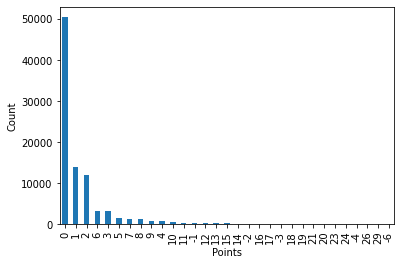

In [63]:
#Select players after GW3.
all_seasons_summary = all_seasons_new[all_seasons_new["GW"]>3]

all_seasons_summary = all_seasons_new[["total_points","total_points_prev1", 
             "bps_prev1",
             "minutes_prev1",
             "transfer_balance_prev1","prev_selected"
             ,"ict_prev1","fixture_diff","goals_scored_prev1",
             "assists_prev1",
             "clean_sheets_prev1",
              "goals_conceded_prev1",
              "influence_prev1",
              "creativity_prev1",
              "threat_prev1",]]

#Plot distribution of points.
fig = plt.figure()
all_seasons_summary["total_points"].value_counts().plot.bar()

plt.xlabel("Points")
plt.ylabel("Count")
plt.show()


In [64]:
#Display summary statistics
a = all_seasons_summary.describe()
a[a.index.isin(['mean','min','max','25%','50%','75%','std'])]

,total_points,total_points_prev1,bps_prev1,minutes_prev1,transfer_balance_prev1,prev_selected,ict_prev1,fixture_diff,goals_scored_prev1,assists_prev1,clean_sheets_prev1,goals_conceded_prev1,influence_prev1,creativity_prev1,threat_prev1
mean,1.376834,1.381848,6.272768,33.449294,-6.210262e+01,1.447473e+05,1.610593,0.974794,0.045041,0.040915,0.106176,0.516427,7.380179,4.825632,5.553624
std,2.516849,2.514818,9.913063,40.874800,3.936202e+04,3.374327e+05,2.981780,1.676228,0.231101,0.214286,0.308065,0.977646,12.979565,10.915494,13.819023
min,-6.000000,-6.000000,-18.000000,0.000000,-1.156152e+06,1.000000e+01,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.354000e+03,5.687000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,2.382200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,11.000000,90.000000,2.500000e+01,1.150200e+05,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,11.000000,3.000000,2.000000
max,29.000000,29.000000,104.000000,90.000000,9.849500e+05,3.981993e+06,35.000000,5.000000,4.000000,3.000000,1.000000,9.000000,163.000000,134.000000,199.000000


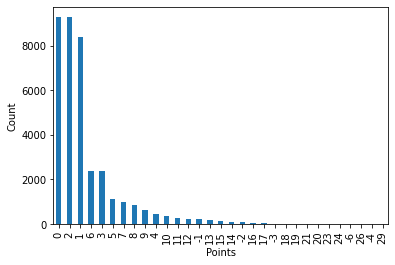

In [65]:
#Filter out interesting players who plays more than 45 minutes.
all_seasons_summary_filter = all_seasons[all_seasons["GW"]>3]
all_seasons_summary_filter = all_seasons_summary_filter[(all_seasons_summary_filter["minutes_prev1"]) +(all_seasons_summary_filter["minutes_prev2"])+ (all_seasons_summary_filter["minutes_prev3"]) >= 40 ]

all_seasons_summary_filter = all_seasons_summary_filter[["total_points","total_points_prev1", 
             "bps_prev1",
             "minutes_prev1",
             "transfer_balance_prev1","prev_selected"
             ,"ict_prev1","fixture_diff","goals_scored_prev1",
             "assists_prev1",
             "clean_sheets_prev1",
              "goals_conceded_prev1",
              "influence_prev1",
              "creativity_prev1",
              "threat_prev1"]]
#Plot points distribution
fig = plt.figure()
all_seasons_summary_filter["total_points"].value_counts().plot.bar()
plt.xlabel("Points")
plt.ylabel("Count")
plt.show()


In [66]:
#Display summary statistics
b = all_seasons_summary_filter.describe()
b[b.index.isin(['mean','min','max','25%','50%','75%','std'])]


,total_points,total_points_prev1,bps_prev1,minutes_prev1,transfer_balance_prev1,prev_selected,ict_prev1,fixture_diff,goals_scored_prev1,assists_prev1,clean_sheets_prev1,goals_conceded_prev1,influence_prev1,creativity_prev1,threat_prev1
mean,2.465141,2.623940,12.031312,64.802528,1.363346e+03,2.487306e+05,3.103323,0.975703,0.086414,0.077559,0.208673,0.994426,14.247960,9.268176,10.568304
std,3.012222,3.014503,11.083430,35.574327,5.419612e+04,4.378003e+05,3.563274,1.677367,0.315160,0.290794,0.406366,1.177268,15.186933,13.811518,17.784971
min,-6.000000,-6.000000,-18.000000,0.000000,-1.156152e+06,2.500000e+01,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,34.000000,-3.596000e+03,2.054325e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,11.000000,90.000000,-1.900000e+02,7.688000e+04,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2.000000,2.000000
75%,3.000000,3.000000,18.000000,90.000000,2.140750e+03,2.641268e+05,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,21.000000,14.000000,15.000000
max,29.000000,29.000000,104.000000,90.000000,9.849500e+05,3.981993e+06,35.000000,5.000000,4.000000,3.000000,1.000000,9.000000,163.000000,134.000000,199.000000
